In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Завдання 1
Завантажте датасет за допомогою функції pandas.read_csv у змінну df. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [23]:
# Завантажуємо датасет
df = pd.read_csv('bikes_rent.csv')

# Виводимо перші 5 рядків датасету
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


Для кожного дня прокату відомі такі ознаки:

season: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
yr: 0 — 2011, 1 — 2012
mnth: від 1 до 12
holiday: 0 — немає свята, 1 — є свято
weekday: від 0 до 6
workingday: 0 — неробочий день, 1 — робочий день
weathersit: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
temp: температура в Цельсіях
atemp: температура за відчуттями в Цельсіях
hum: вологість
windspeed(mph): швидкість вітру в милях за годину
windspeed(ms): швидкість вітру в метрах за секунду
cnt: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)
Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

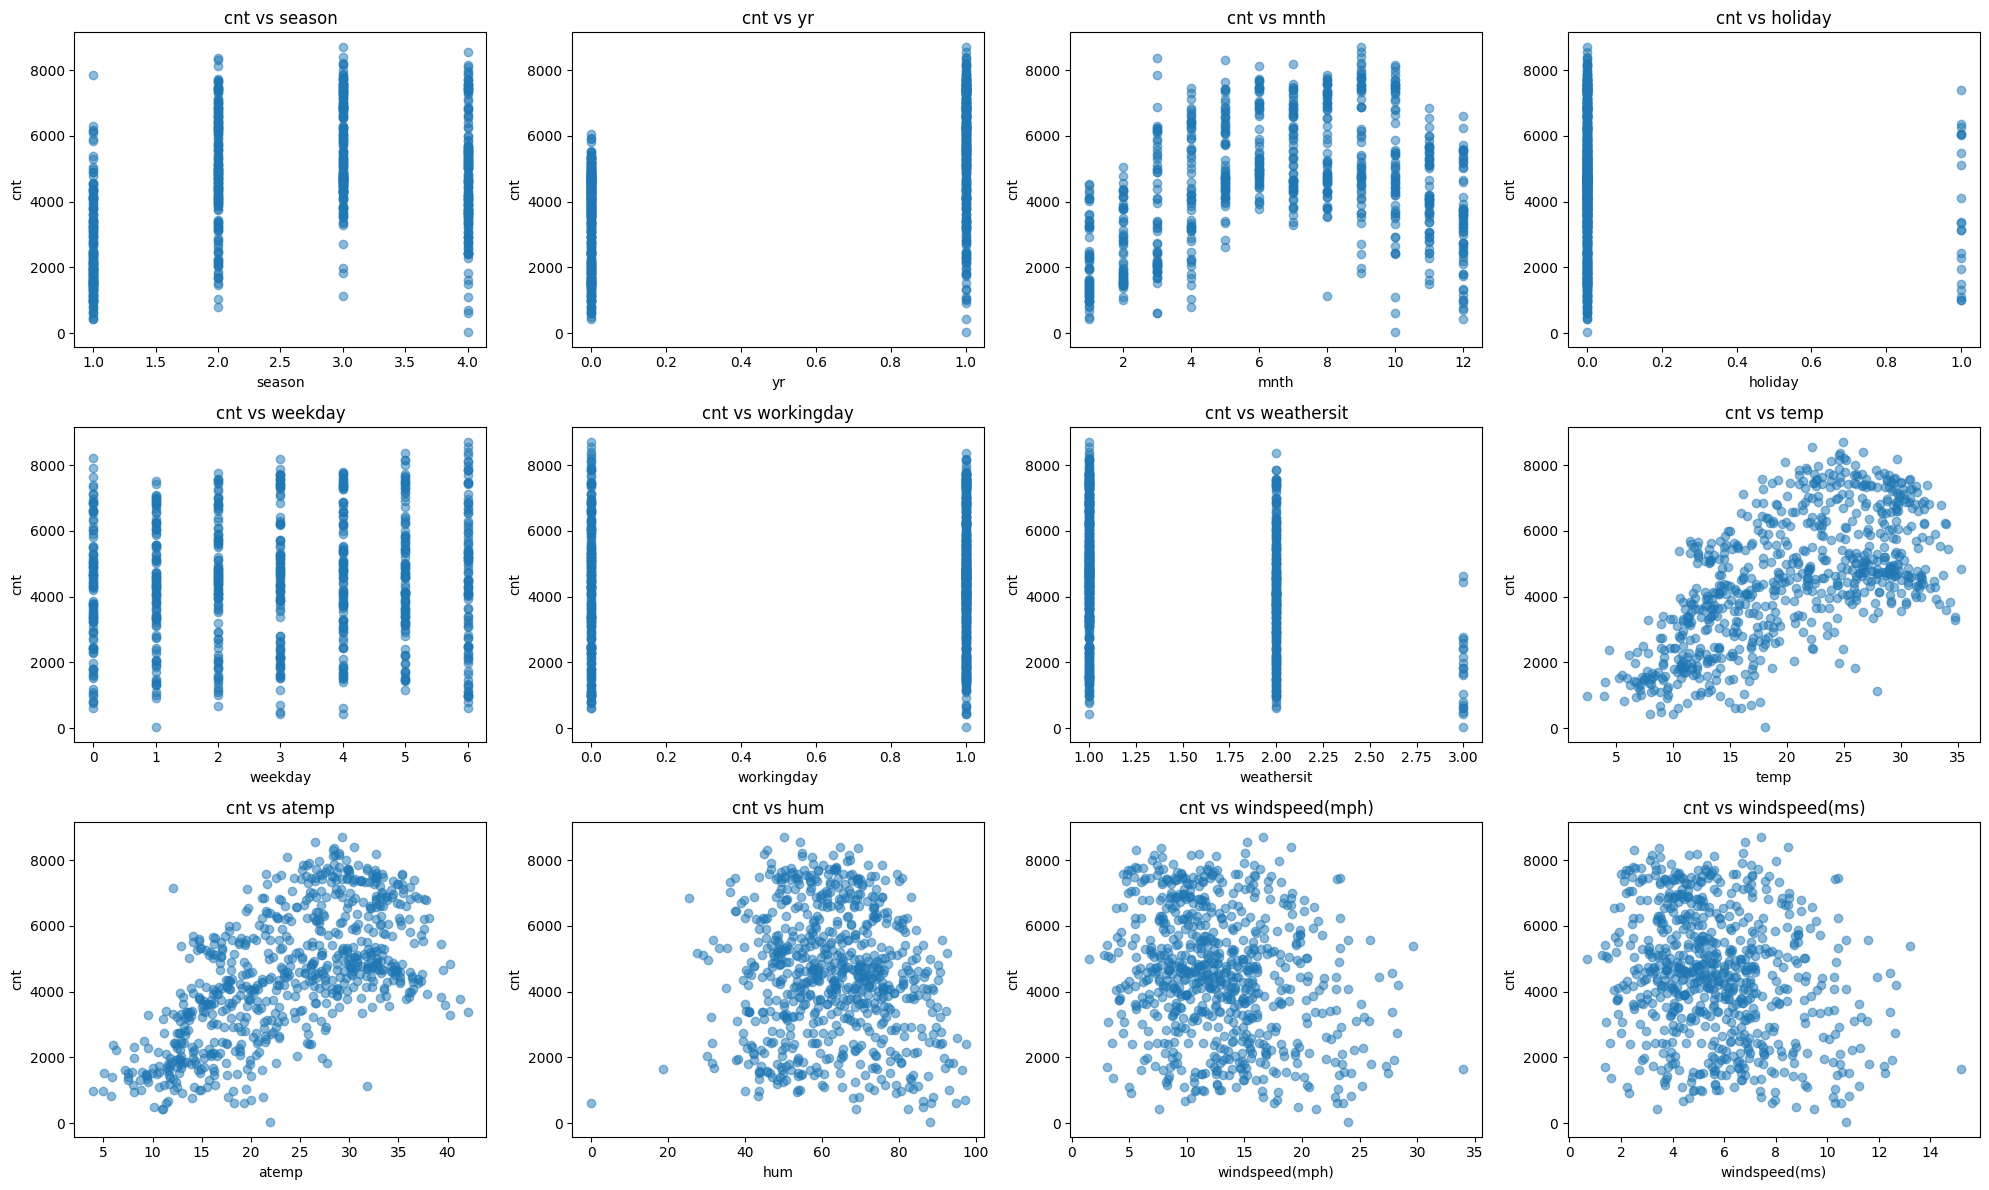

In [24]:
# Задаємо розміри графіків
plt.figure(figsize=(20, 12))

# Список ознак для побудови графіків
attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Побудова графіків
for i, attr in enumerate(attributes):
    plt.subplot(3, 4, i + 1)
    plt.scatter(df[attr], df['cnt'], alpha=0.5)
    plt.xlabel(attr)
    plt.ylabel('cnt')
    plt.title(f'cnt vs {attr}')

plt.tight_layout()
plt.show()

Завдання 2
Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу corrwith.

In [25]:
# Вибираємо всі речові ознаки, окрім останньої (цільової змінної cnt)
numerical_features = df.iloc[:, :-1]

# Обчислюємо кореляції за допомогою методу corrwith
correlations = numerical_features.corrwith(df['cnt'])

# Виводимо результати
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


Завдання 3
Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt за допомогою методу corr.

На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

In [26]:
# Вибираємо потрібні ознаки для обчислення кореляцій
features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']

# Обчислюємо кореляції за допомогою методу corr
correlations = df[features].corr()

# Виводимо матрицю кореляцій
print(correlations)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


Завдання 4
Виведіть середні ознак.
Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

Проблема перша: колінеарні ознаки
Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.
Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.
Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [27]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

# Виведення середніх значень ознак
print(df.mean())

# Перемішуємо датасет
df_shuffled = shuffle(df, random_state=42)

# Виконуємо стандартизацію (масштабування) ознак
X = scale(df_shuffled[df_shuffled.columns[:-1]])  # Всі ознаки крім останньої (цільової змінної)
y = df_shuffled["cnt"]  # Цільова змінна

# Переконуємося, що X і y мають правильні розміри
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64
Shape of X: (731, 12)
Shape of y: (731,)


Завдання 5
Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній coef_ класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією zip, вбудованою в мову python. Назви ознак зберігаються у змінній df.columns.

In [28]:
from sklearn.linear_model import LinearRegression

# Ініціалізуємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель на нормалізованих даних
model.fit(X, y)

# Виводимо ваги ознак (коефіцієнти моделі)
print("Weights (coefficients):")
for feature, coef in zip(df.columns[:-1], model.coef_):
    print(f"{feature}: {coef:.4f}")


Weights (coefficients):
season: 570.8638
yr: 1021.9649
mnth: -141.3017
holiday: -86.7596
weekday: 137.2250
workingday: 56.3920
weathersit: -330.2265
temp: 367.4839
atemp: 585.5496
hum: -145.6142
windspeed(mph): 12457138390688.8848
windspeed(ms): -12457138390887.3457


In [29]:
# Великі коефіцієнти швидкості вітру (залишимо лише ms)

# Вибірка даних без ознаки windspeed(ms)
df_cleaned = df.drop(columns=['windspeed(mph)'])

# Перемішуємо та масштабуємо очищені дані
df_cleaned_shuffled = shuffle(df_cleaned, random_state=42)
X_cleaned = scale(df_cleaned_shuffled[df_cleaned_shuffled.columns[:-1]])
y_cleaned = df_cleaned_shuffled["cnt"]

# Ініціалізуємо та навчаємо модель на очищених даних
model_cleaned = LinearRegression()
model_cleaned.fit(X_cleaned, y_cleaned)

# Виводимо ваги ознак для очищених даних
print("\nWeights (coefficients) after removing windspeed(ms):")
for feature, coef in zip(df_cleaned.columns[:-1], model_cleaned.coef_):
    print(f"{feature}: {coef:.4f}")


Weights (coefficients) after removing windspeed(ms):
season: 565.8745
yr: 1020.3507
mnth: -134.4620
holiday: -86.6926
weekday: 138.3603
workingday: 55.9558
weathersit: -332.6956
temp: 371.1410
atemp: 581.9066
hum: -145.0162
windspeed(ms): -198.0705


Завдання 6
Давайте спробуємо навчити лінійні моделі з  𝐿1  і  𝐿2 -регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

1. Навчіть лінійну модель з 𝐿1-регуляризацією (клас Lasso) і виведіть ваги.
2. Навчіть лінійну модель з  𝐿2 -регуляризацією (клас Ridge) і виведіть ваги.

In [30]:
print ('Навчіть лінійну модель з 𝐿1-регуляризацією (клас Lasso) і виведіть ваги.')

from sklearn.linear_model import Lasso

# Ініціалізуємо модель Lasso з параметрами за замовчуванням (alpha=1.0)
lasso_model = Lasso()

# Навчаємо модель на всіх даних
lasso_model.fit(X, y)

# Виводимо ваги ознак (коефіцієнти моделі)
print("Weights (coefficients) using Lasso regularization:")
for feature, coef in zip(df.columns[:-1], lasso_model.coef_):
    print(f"{feature}: {coef:.4f}")


Навчіть лінійну модель з 𝐿1-регуляризацією (клас Lasso) і виведіть ваги.
Weights (coefficients) using Lasso regularization:
season: 560.2416
yr: 1019.4635
mnth: -128.7306
holiday: -86.1528
weekday: 137.3479
workingday: 55.2124
weathersit: -332.3699
temp: 376.3632
atemp: 576.5308
hum: -144.1292
windspeed(mph): -197.1397
windspeed(ms): -0.0000


In [31]:
print ('Навчіть лінійну модель з  𝐿2 -регуляризацією (клас Ridge) і виведіть ваги')

from sklearn.linear_model import Ridge

# Ініціалізуємо модель Ridge з параметрами за замовчуванням (alpha=1.0)
ridge_model = Ridge()

# Навчаємо модель на всіх даних
ridge_model.fit(X, y)

# Виводимо ваги ознак (коефіцієнти моделі)
print("Weights (coefficients) using Ridge regularization:")
for feature, coef in zip(df.columns[:-1], ridge_model.coef_):
    print(f"{feature}: {coef:.4f}")


Навчіть лінійну модель з  𝐿2 -регуляризацією (клас Ridge) і виведіть ваги
Weights (coefficients) using Ridge regularization:
season: 563.0646
yr: 1018.9484
mnth: -131.8733
holiday: -86.7461
weekday: 138.0051
workingday: 55.9031
weathersit: -332.3498
temp: 386.4579
atemp: 566.3470
hum: -145.0713
windspeed(mph): -99.2594
windspeed(ms): -99.2594


Завдання 7
На відміну від  𝐿2 -регуляризації,  𝐿1  обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації  𝛼 .

Для кожного значення коефіцієнта з alphas навчіть регресор Lasso і запишіть ваги у список coefs_lasso, а потім навчіть Ridge і запишіть ваги у списокcoefs_ridge. Конвертуйте отримані списки в np.array.

Lasso Coefficients:
Alpha = 0.1: [ 5.65321657e+02  1.02025610e+03 -1.33895006e+02 -8.66672792e+01
  1.38219834e+02  5.58703568e+01 -3.32695555e+02  3.77368324e+02
  5.75672782e+02 -1.44871247e+02 -1.98105578e+02 -2.82848084e-08]
Alpha = 1.0: [ 5.60241616e+02  1.01946349e+03 -1.28730627e+02 -8.61527813e+01
  1.37347894e+02  5.52123706e+01 -3.32369857e+02  3.76363236e+02
  5.76530794e+02 -1.44129155e+02 -1.97139689e+02 -2.80514042e-08]
Alpha = 10.0: [ 5.09440841e+02  1.01153763e+03 -7.70866245e+01 -8.10068051e+01
  1.28629856e+02  4.86328953e+01 -3.29111746e+02  3.66113722e+02
  5.85309238e+02 -1.36710198e+02 -1.87476347e+02 -2.59124173e-08]
Alpha = 100.0: [ 3.70891960e+02  9.36765693e+02  0.00000000e+00 -1.30748202e+01
  4.97517525e+01  0.00000000e+00 -3.08962222e+02  2.70515501e+02
  6.32044139e+02 -2.87901463e+01 -9.48092251e+01 -2.41458874e-08]

Ridge Coefficients:
Alpha = 0.1: [ 565.59279614 1020.21020536 -134.20179352  -86.69921615  138.32312011
   55.95017182 -332.66278694  372.90

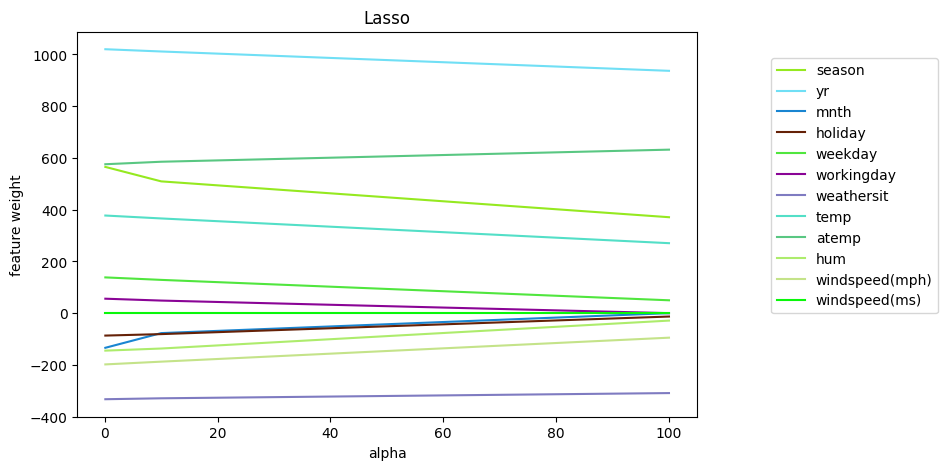

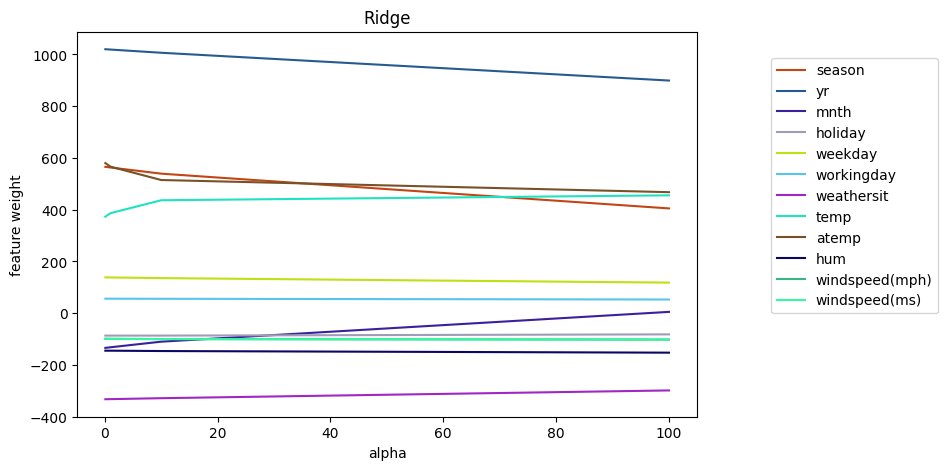

In [32]:

# Задаємо список значень alpha для регуляризації
alphas = [0.1, 1.0, 10.0, 100.0]

# Ініціалізуємо списки для зберігання ваг
coefs_lasso = []
coefs_ridge = []

# Навчаємо моделі для кожного значення alpha і записуємо ваги
for alpha in alphas:
    # Лінійна модель з L1-регуляризацією (Lasso)
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, y)
    coefs_lasso.append(lasso_model.coef_)
    
    # Лінійна модель з L2-регуляризацією (Ridge)
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    coefs_ridge.append(ridge_model.coef_)

# Конвертуємо списки в np.array для подальшого аналізу
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

# Виведемо результати
print("Lasso Coefficients:")
for i, alpha in enumerate(alphas):
    print(f"Alpha = {alpha}: {coefs_lasso[i]}")

print("\nRidge Coefficients:")
for i, alpha in enumerate(alphas):
    print(f"Alpha = {alpha}: {coefs_ridge[i]}")



#!!!!!!!!!!!!
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Завдання 8

Далі будемо працювати з Lasso.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто Mean Square Error.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати alpha за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на  𝐾  частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, LassoCV, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну mse_path_, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha_ буде зберігатися вибране значення параметра регуляризації, а в coef_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор LassoCV на всіх параметрах регуляризації з alpha. Побудуйте графік усередненого за рядками MSE в залежності від alpha (використовуйте для цього функцію create_plot).

Виведіть вибране alpha, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

regressor.alphas_: [96 91 86 81 76 71 66 61 56 51 46 41 36 31 26 21 16 11  6  1]
mse_means: [851990.72268622 846392.15883646 840822.79452996 835574.34242349
 830286.6292665  825198.48200101 820159.70188599 815491.23843715
 811192.90438185 807264.70262735 803575.5866472  800211.24746207
 797217.56999301 794594.56066723 792342.19576555 789464.66320254
 786750.84083864 783634.3772912  781531.09081992 785055.14678702]


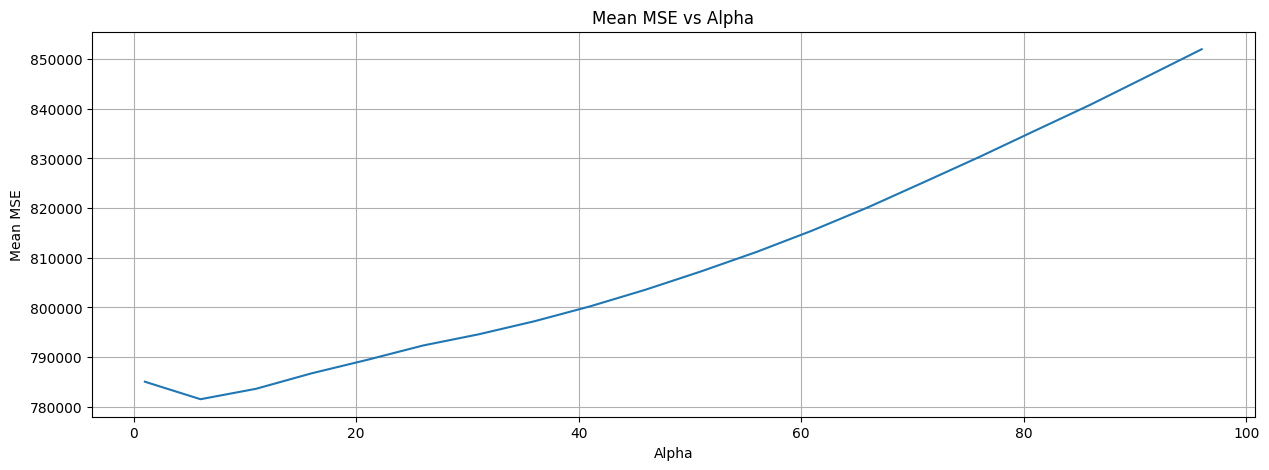

Optimal alpha: 6
Feature coefficients:
season: 532.0190
yr: 1015.0602
mnth: -100.0395
holiday: -83.2940
weekday: 132.5045
workingday: 51.5571
weathersit: -330.5599
temp: 370.6799
atemp: 581.3969
hum: -140.0074
windspeed(mph): -191.7714
windspeed(ms): -0.0000


In [34]:
from sklearn.linear_model import LassoCV

def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    # Перетворюємо на списки
    x, y = zip(*data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

# Масив значень alpha
alphas = np.arange(1, 100, 5)

# Ініціалізація LassoCV з перехресною валідацією
regressor = LassoCV(alphas=alphas, cv=3)

# Навчання регресора
regressor.fit(X, y)

# Отримання MSE для кожного значення alpha
mse_means = regressor.mse_path_.mean(axis=1)

# Діагностика
print("regressor.alphas_:", regressor.alphas_)
print("mse_means:", mse_means)

# Переконаємося, що regressor.alphas_ і mse_means мають однакову кількість елементів
if len(regressor.alphas_) != len(mse_means):
    raise ValueError("regressor.alphas_ and mse_means must have the same length")

# Побудова графіка MSE в залежності від alpha
create_plot(zip(regressor.alphas_, mse_means), 'Mean MSE vs Alpha', 'Alpha', 'Mean MSE')

# Виведення вибраного значення alpha
print(f"Optimal alpha: {regressor.alpha_}")

# Виведення пар "ознака-коефіцієнт"
print("Feature coefficients:")
for feature, coef in zip(df.columns[:-1], regressor.coef_):
    print(f"{feature}: {coef:.4f}")




Завдання 9

Виведіть значення alpha, що відповідають мінімумам MSE на кожному розбитті (тобто за стовпцями). На трьох окремих графіках візуалізуйте стовпці mse_path_.

На кожному розбитті оптимальне значення alpha своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі alpha на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

regressor.alphas_: [96 91 86 81 76 71 66 61 56 51 46 41 36 31 26 21 16 11  6  1]
mse_means: [851990.72268622 846392.15883646 840822.79452996 835574.34242349
 830286.6292665  825198.48200101 820159.70188599 815491.23843715
 811192.90438185 807264.70262735 803575.5866472  800211.24746207
 797217.56999301 794594.56066723 792342.19576555 789464.66320254
 786750.84083864 783634.3772912  781531.09081992 785055.14678702]


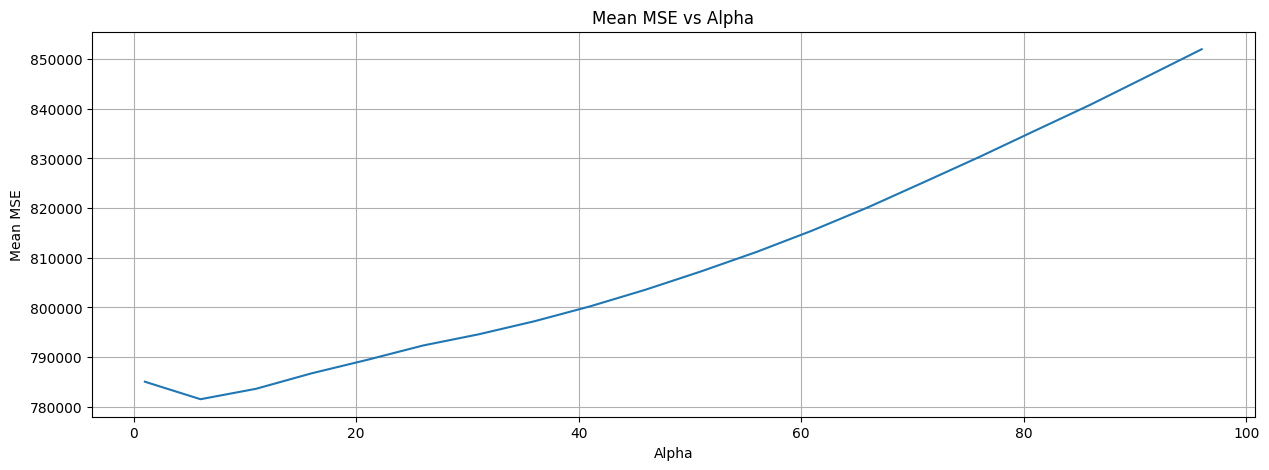

Optimal alpha: 6
Feature coefficients:
season: 532.0190
yr: 1015.0602
mnth: -100.0395
holiday: -83.2940
weekday: 132.5045
workingday: 51.5571
weathersit: -330.5599
temp: 370.6799
atemp: 581.3969
hum: -140.0074
windspeed(mph): -191.7714
windspeed(ms): -0.0000

Alphas with minimum MSE:
Alpha = 6, MSE = 733725.7604052249
Alpha = 1, MSE = 799433.1673691692
Alpha = 51, MSE = 796979.8955193626


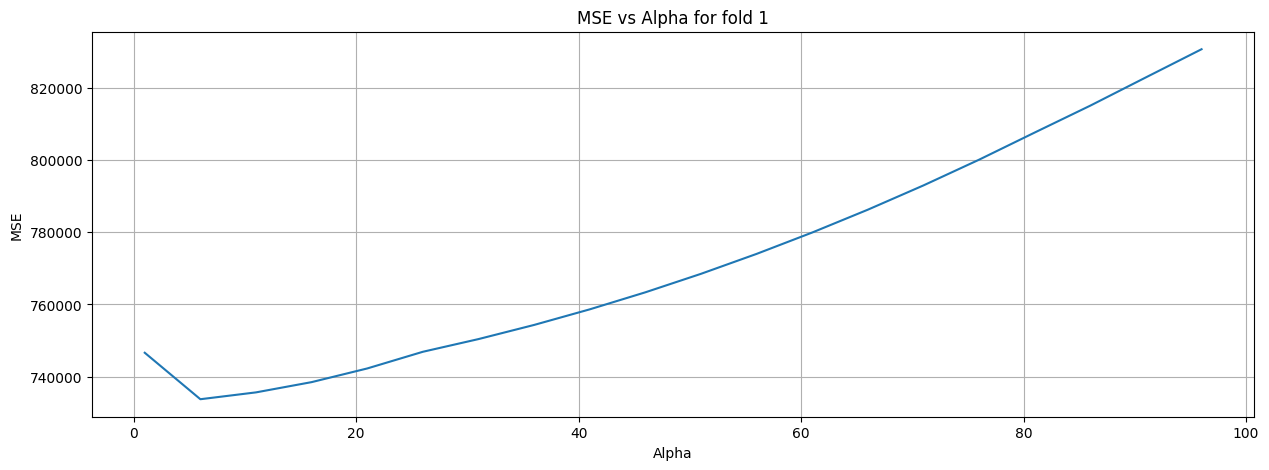

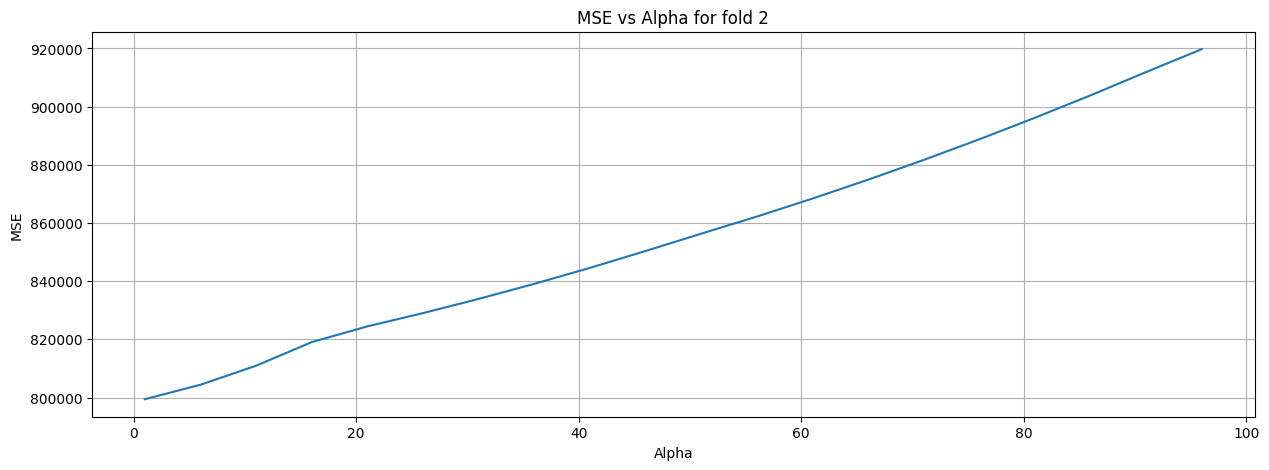

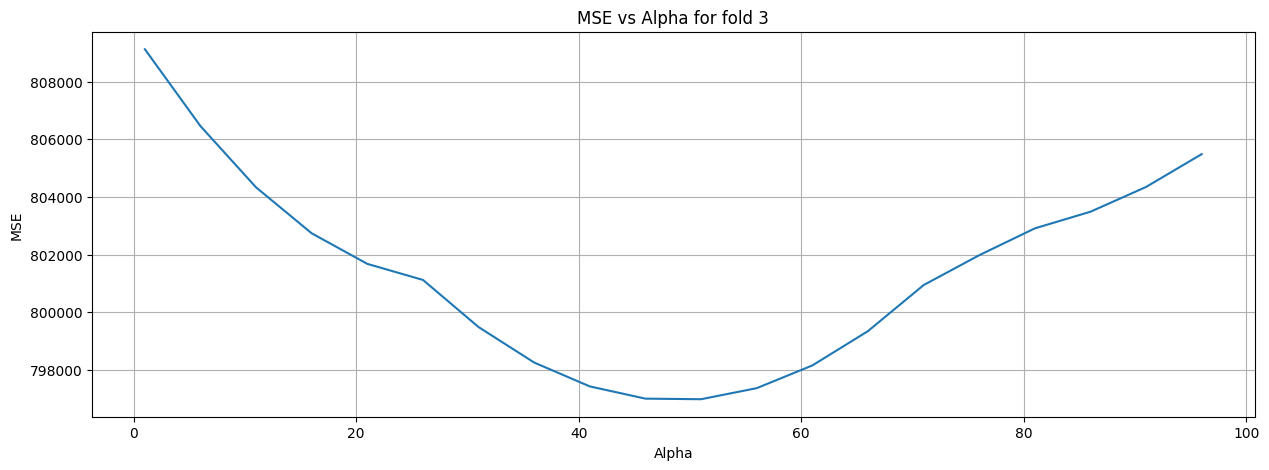

In [35]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    # Перетворюємо на списки
    x, y = zip(*data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

# Масив значень alpha
alphas = np.arange(1, 100, 5)

# Ініціалізація LassoCV з перехресною валідацією
regressor = LassoCV(alphas=alphas, cv=3)

# Навчання регресора
regressor.fit(X, y)

# Отримання MSE для кожного значення alpha
mse_means = regressor.mse_path_.mean(axis=1)

# Діагностика
print("regressor.alphas_:", regressor.alphas_)
print("mse_means:", mse_means)

# Переконаємося, що regressor.alphas_ і mse_means мають однакову кількість елементів
if len(regressor.alphas_) != len(mse_means):
    raise ValueError("regressor.alphas_ and mse_means must have the same length")

# Побудова графіка MSE в залежності від alpha
create_plot(zip(regressor.alphas_, mse_means), 'Mean MSE vs Alpha', 'Alpha', 'Mean MSE')

# Виведення вибраного значення alpha
print(f"Optimal alpha: {regressor.alpha_}")

# Виведення пар "ознака-коефіцієнт"
print("Feature coefficients:")
for feature, coef in zip(df.columns[:-1], regressor.coef_):
    print(f"{feature}: {coef:.4f}")

# Виведення значень alpha, що відповідають мінімумам MSE на кожному розбитті
min_alphas = regressor.alphas_[np.argmin(regressor.mse_path_, axis=0)]
min_mses = np.min(regressor.mse_path_, axis=0)

print("\nAlphas with minimum MSE:")
for i, (alpha, mse) in enumerate(zip(min_alphas, min_mses)):
    print(f"Alpha = {alpha}, MSE = {mse}")

# Візуалізація стовпців mse_path_
for i in range(regressor.mse_path_.shape[1]):
    create_plot(zip(regressor.alphas_, regressor.mse_path_[:, i]), f'MSE vs Alpha for fold {i+1}', 'Alpha', 'MSE')


Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей cnt від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

Відповідь:

Візуалізації залежностей cnt від ознак yr, atemp, season, і temp мають показати зростаючі лінійні залежності. 

1. yr: Логічно, що кількість людей, які беруть велосипеди, зростає з часом, оскільки програма оренди велосипедів стає популярнішою.
2. atemp і temp: Вищі температури (в розумних межах) можуть бути більш комфортними для їзди на велосипеді, що збільшує кількість оренд.
3. season: Деякі сезони, наприклад, весна та літо, можуть бути більш привабливими для їзди на велосипеді через кращу погоду.

Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

Відповідь:

Чи видно лінійну залежність, що зменшується?

Візуалізації залежностей cnt від ознак hum, windspeed, і workingday повинні показати лінійні залежності, що зменшуються.

1. hum (вологість): Логічно, що при високій вологості повітря їзда на велосипеді може бути менш комфортною, тому кількість оренд зменшується.
2. windspeed (швидкість вітру): Висока швидкість вітру може робити їзду на велосипеді важкою і небезпечною, що також зменшує кількість оренд.
3. workingday (робочий день): У робочі дні люди можуть мати менше часу на поїздки на велосипеді, що призводить до меншої кількості оренд.


Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

Відповідь:

temp і atemp: На графіках залежностей cnt від цих ознак може бути видно, що ці ознаки мають лінійну залежність з cnt. Однак, якщо вони сильно корелюють одна з одною або з іншими ознаками, модель могла виключити одну з них як зайву.

Таким чином, ці ознаки можуть впливати на попит на велосипеди, але модель їх виключила через високу кореляцію з іншими ознаками або через те, що вони не надають додаткової інформації для передбачення.